# **TIME SERIES FORECASTING - ARMA PROCESS**

Name: **ARMA Process**  
Date : 2022  
Author: Aurélien Vannieuwenhuyze  


<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Licence Creative Commons" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under the terms of the <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License.</a>.
<hr/>

In [1]:
!pip install statsmodels 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.9 MB 2.5 MB/s 
     |████████████████████████████████| 9.9 MB 47.1 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2


In [3]:
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import  plot_pacf, plot_acf
import statsmodels.api as sm
import numpy as np
import pmdarima as pm
import pandas as pnd

##**1: ARMA PROCESS IN ACTION**

In the previous notebooks, we saw that a **stationary** time series could be modeled using an AR model or an MA model.

A stationary series can also be a combination of both.

This is what we will discover here

In [5]:
# For pedagogical use (reproducibility of results)

Yt= [-0.94216524,  0.12892679,  2.05555533,  1.21586214,  0.97943287,  1.29969417,
 -0.49042949, -1.22252448, -1.1241548,  -3.02752469, -3.4205423,  -1.62958283,
 -0.32345827,  0.65257529,  3.40447935,  5.43991877,  4.91913543,  3.92927341,
  3.03181033,  2.77853765,  2.37742798,  3.12466853,  3.9553094,   4.24553553,
  3.19966159,  3.00675334,  1.37955289,  1.93570865,  2.48074725,  0.44547074,
 -0.31515311, -1.11903049, -3.21961093, -4.13806225, -2.55389771,  0.15802869,
  1.46340598,  1.70315459,  2.58385247,  2.38944031,  2.51205465,  2.27709556,
 -0.10609773, -0.59422976, -1.06466817, -1.19907987,  0.17739203, -0.43868538,
 -0.94152633,  0.88137322,  3.14930097,  3.17688766,  2.20544388, -0.99275343,
 -4.30427675, -3.46297088, -3.08568962, -1.46362582, -1.20000137, -0.61792817,
  0.70248971, -1.62197943, -3.14088242, -2.46757343, -1.23701268,  1.12265803,
  3.43757925,  4.85948529,  3.29141961,  1.75113266,  0.79971737, -0.2814663,
 -1.05295173, -2.03496332, -2.23793904,  1.25650026,  2.55539987,  1.83710394,
  2.65568859, 2.55927645,  1.16260569,  0.78860986,  0.34334404, -0.74411946,
 -0.54584736, -1.84365025, -1.95699662, -0.9130457,  -0.28126731,  1.7258817,
  1.46396957, -0.18508198, -1.28417202, -3.00668864, -2.59894568, -1.17858585,
 -2.00644411, -3.03839168, -2.35784616, -3.80093744, -4.09907336, -2.93341169,
 -0.80591567, -0.03088393,  1.61284142,  1.28951979,  0.08455068,  0.32300047,
 -1.9426835,  -1.80056685, -2.14844162, -1.41446544, -0.83821524,  0.12177559,
  1.1832252,   0.350567,   -0.36797513, -1.51430341, -1.1104015,  -0.85245922,
 -0.40428698,  1.09276217,  1.29831129, -0.36842622,  1.09707089,  1.44699522,
 -0.80553437, -0.90286645, -1.28102146, -2.26375314, -1.56683709, -1.22876042,
 -2.15142093, -4.08605275, -4.68584246, -2.70977986, -0.87674593, -0.68002607,
 -0.2088123,   0.37426863, -0.53980258,  0.56663955,  1.79697721,  0.24026423,
 -1.50375784, -2.67767524, -3.70433408, -3.05102152, -2.13188029, -0.16094747,
  1.15122374,  0.44124644,  0.59476363,  2.62879017,  3.82981783,  3.22593033,
  3.24949408,  2.43145044,  2.93459798,  2.84153249,  2.205979,    1.72813414,
 -0.04524008, -1.72468956, -3.75759824, -3.8861657,  -2.11997786,  0.6718682,
  2.54450466,  3.08076383,  3.43685042,  3.94245278,  3.51577875,  3.97382819,
  3.71739042,  0.34663238, -2.40157954, -3.68819781, -2.67709023, -1.32504602,
  0.90574728,  2.23549619,  2.42608062,  1.68822033,  0.09215654, -0.60824637,
 -0.12395744,  0.87574507,  0.39695914,  1.85858662,  2.01763454,  2.49355851,
  5.57430937,  6.70465696,  6.37186988,  4.68006303,  3.59335307,  1.49260844,
  1.41713535,  1.77538934,  1.26045864,  0.58947486, -0.51213046, -1.45518771,
 -3.02378146, -3.03511554, -0.14085109,  0.06228696, -1.09433909, -0.33717887,
 -0.81973425, -0.36852998,  0.3676212,   1.25416013,  2.231662,    0.60014049,
 -0.29532084, -0.61797522, -0.31713518, -1.094366,   -1.83121481, -0.51435235,
 -0.19314641,  0.60512072,  0.05857935,  0.50179281,  1.54937537,  1.563405,
  1.79887296,  1.00223956,  0.43473104,  1.11767703,  0.5581184,   0.6892758,
  1.32694546,  1.99326851,  1.76785192,  1.24389883,  1.22418043, -0.03165222,
 -1.06915941, -1.85948301, -1.84568889, -1.50256562, -1.54259732, -1.15796573,
 -1.945572,   -3.17496852, -1.36359255,  1.2866784, ]

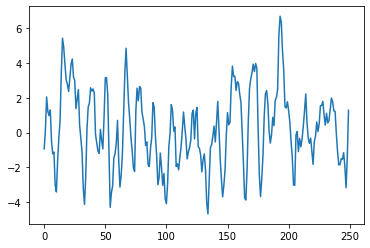

In [6]:
plt.plot(Yt)
plt.show()

In [7]:
ADF = adfuller(Yt)
print('ADF Statistic: %f' % ADF[0])

print('p-value: %f' % ADF[1])

if ADF[1] < 0.05:
    print ("Reject Ho - Time Series is Stationary")
else:
    print ("Failed to Reject Ho - Time Series is Non-Stationary")

ADF Statistic: -5.437848
p-value: 0.000003
Reject Ho - Time Series is Stationary


###1.1: Find the significant lag of partial autocorrelation with PACF

/usr/local/lib/python3.8/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


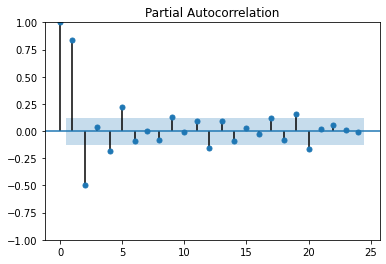

In [8]:
plot_pacf(np.array(Yt))
plt.show()

In [9]:
significantARLag = 2 #Found with PACF

$$AR(2)$$

$$y_t = c + \beta_1y_{t-1} + \beta_2y_{t-2} + \epsilon_t$$

###1.2: Find the significant lag of autocorrelation with ACF

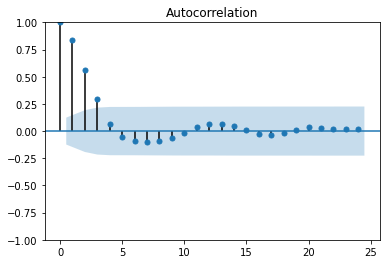

In [10]:
plot_acf(np.array(Yt))
plt.show()

In [11]:
significantMALag = 3 #Found with ACF

$$MA(3)$$

$$y_t = \mu + \epsilon_t + \beta_1*\epsilon_{t-1} +\beta_2*\epsilon_{t-2} + \beta_3*\epsilon_{t-3}$$

###1.3: PMDArima

In [12]:
ARMA = pm.ARIMA(order=(significantARLag, 0,significantMALag))
ARMA.fit(Yt)

ARIMA(order=(2, 0, 3))

In [13]:
ARMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  250
Model:               SARIMAX(2, 0, 3)   Log Likelihood                -348.189
Date:                Thu, 01 Dec 2022   AIC                            710.378
Time:                        08:28:30   BIC                            735.028
Sample:                             0   HQIC                           720.299
                                - 250                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.1144      0.150      0.765      0.444      -0.179       0.408
ar.L1          0.7966      0.161      4.944      0.000       0.481       1.112
ar.L2         -0.2941      0.132     -2.228      0.026      -0.553      -0.035
ma.L1          0.5647      0.151      3.749      0.000       0.270       0.860
ma.L2          0.2800      0.129      2.164      0.030       0.026       0.534
ma.L3          0.4810      0.081      5.974      0.000       0.323       0.639
sigma2         0.9389      0.087     10.749      0.000       0.768       1.110
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):                 1.34
Prob(Q):                              0.96   Prob(JB):                         0.51
Heteroskedasticity (H):               0.75   Skew:                             0.17
Prob(H) (two-sided):                  0.20   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

- AR parameters:  $\beta_1 = 0.7966$, $\beta_2 = -0.2941$
- MA parameters:  $\beta_1 = 0.5647$, $\beta_2 = 0.2800$, $\beta_3=0.4810$
- intercept : $0.1144$

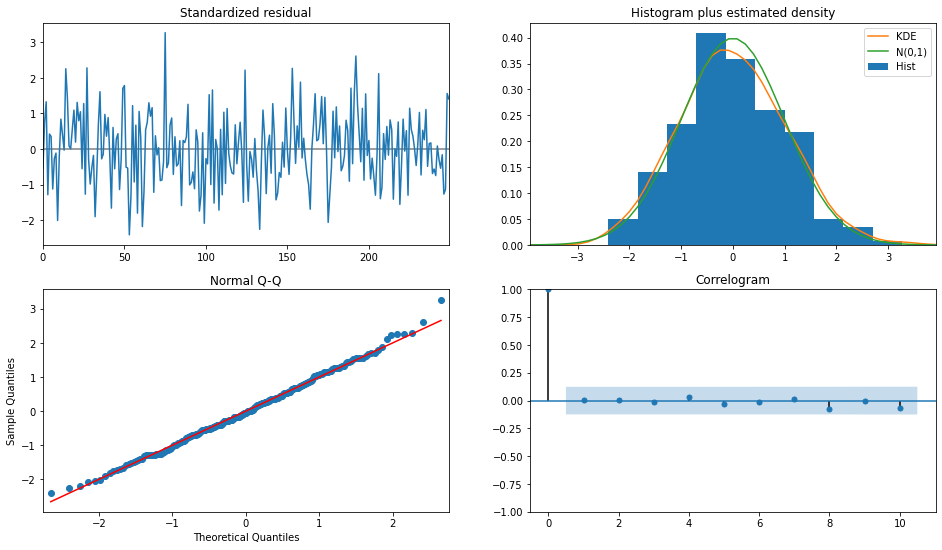

In [14]:
fig = plt.figure(figsize=(16, 9))
ARMA.plot_diagnostics(fig=fig)
plt.show()

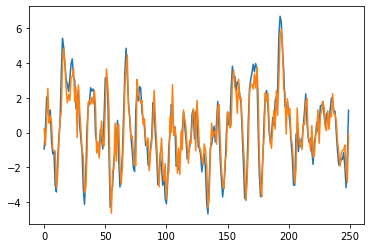

In [15]:
predictions = ARMA.predict_in_sample(Yt)
plt.plot(Yt)
plt.plot(predictions)
plt.show()

In [ ]:
prediction_on_train = ARMA.predict_in_sample(Yt)
predictions = ARMA.predict(n_periods = 10)

all_pred = np.concatenate((prediction_on_train,predictions),axis=0)


plt.plot(Yt)
plt.plot(all_pred)
plt.show()